<a href="https://colab.research.google.com/github/SkandarEverest/praktikum_ml/blob/main/IF5140_Praktikum_1_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Silvia Rahma

NIM:23525021

Nama: Fadhil Rausyanfikr

NIM:23525046

# Import Library & Dataset

[Link Dataset](https://drive.google.com/file/d/1IjVOEJ-gQV9uxXyYNvbAcNPZvdmDQCrO/view?usp=drive_link)

Deskripsi Dataset:

1. Student ID: Identifikasi unik untuk setiap siswa.
2. Age: Usia siswa (15-18 tahun).
3. Gender: Jenis kelamin siswa (0: Laki-Laki, 1: Perempuan).
4. Ethnicity: Etnis siswa (0: Caucasian, 1: African American, 2: Asian, 3: Other).
5. Parental Education: Tingkat edukasi orang tua siswa (0: Tidak ada, 1: SMA, 2: Some College, 3: S1, 4: S2/S3).
6. StudyTimeWeekly: Lama waktu yang dihabiskan untuk belajar (0-20 jam).
7. Absences: Jumlah absen selama satu tahun sekolah (0-30 kali).
8. Tutoring: Apakah pelajar mengikuti tutor atau tidak (0: No, 1: Yes).
9. Parental Support: Tingkat keterlibatan orang tua dalam pembelajaran siswa (0: Tidak ada, 1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi).
10. Extracurricular: Apakah siswa mengikuti aktivitas ekstrakurikuler (0: Tidak, 1: Ya).
11. Sports: Apakah siswa bepartisipasi pada kegiatan olahraga (0: Tidak, 1: Ya).
12. Music: Apakah siswa berpartisipasi pada kegiatan musik (0: Tidak, 1: Ya).
13. Volunteering: Apakah siswa berpartisipasi pada kegiatan sukarela  (0: Tidak, 1: Ya).
14. Grade Class: Klasifikasi nilai siswa (0: A, 1: B, 2: C, 3: D, 4: F).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/machine learning/dataset/Student_performance_data_prak_1_.csv")



# Exploratory Data Analysis (EDA)

**Descriptive Analysis**

Melakukan analisis pada dataset untuk mendapatkan gambaran singkat terkait dataset seperti jumlah kolom dan baris, tipe data, jumlah null values pada dataset, dan lain-lain.

`df.head()`

`df.info()`

`df.describe()`

`df.isnull()`

**Visualization**

**Berikan contoh minimal 3 (tiga) visualisasi hasil eksplorasi dataset beserta penjelasan singkat untuk setiap visualisasi.**


In [ ]:
df.head(20)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,C
1,1002,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,B
2,1003,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,F
3,1004,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,D
4,1005,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,F
5,1006,18,Male,Caucasian,1,8.191219,0,0,1,1,0,0,0,B
6,1007,15,Male,African American,1,15.601680,10,0,3,0,1,0,0,C
7,1008,15,Female,African American,4,15.424496,22,1,1,1,0,0,0,F
8,1009,17,Male,Caucasian,0,4.562008,1,0,2,0,1,0,1,C
9,1010,16,Female,Caucasian,1,18.444466,0,0,3,1,0,0,0,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GradeClass         2392 non-null   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 261.8+ KB


In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,C
1,1002,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,B
2,1003,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,F
3,1004,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,D
4,1005,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,F


In [ ]:
df.describe()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191
std,690.655244,1.123798,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057
min,1001.000000,15.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2196.500000,16.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2794.250000,17.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,3392.000000,18.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Count plot

In [ ]:
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

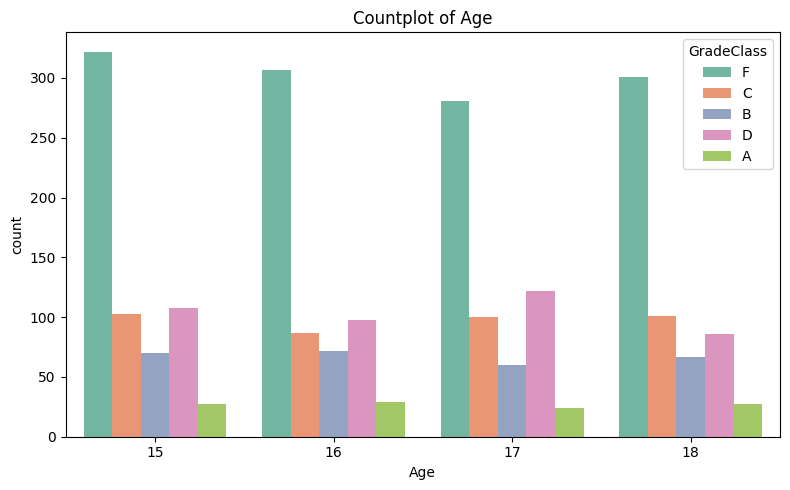

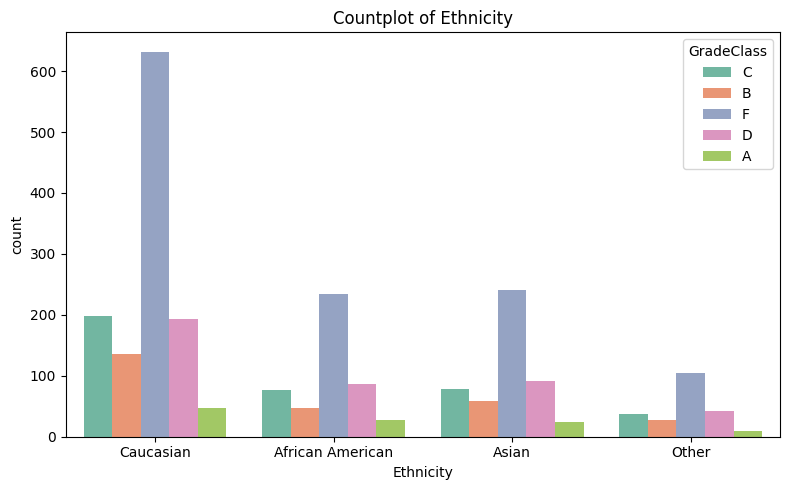

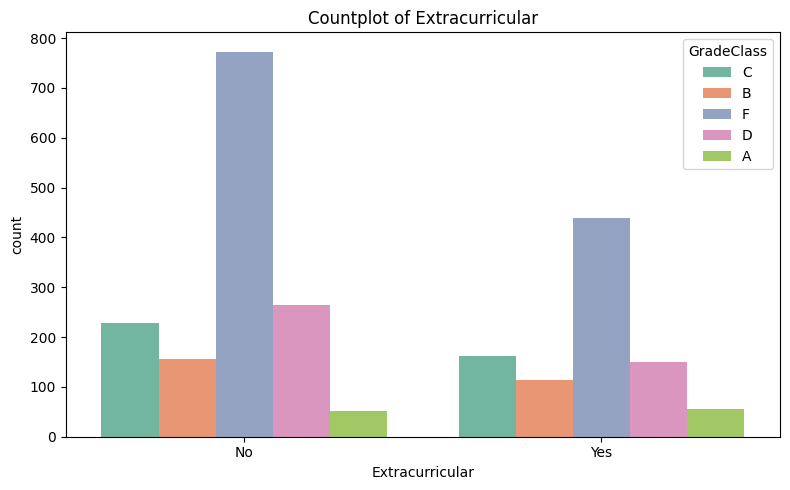

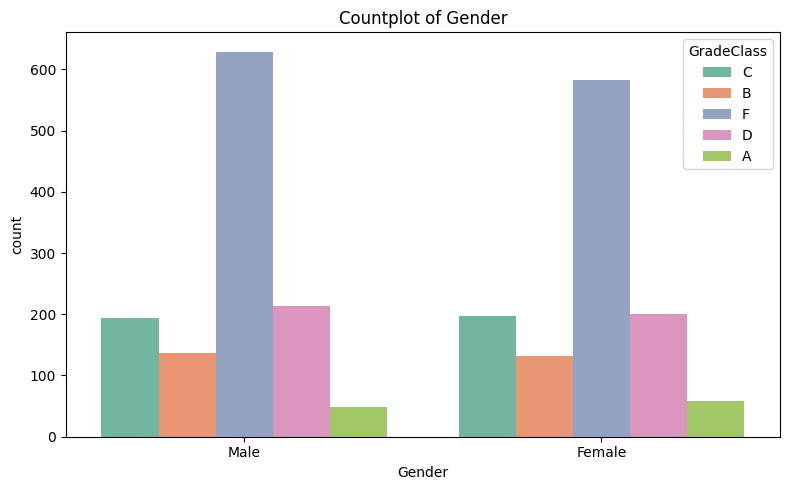

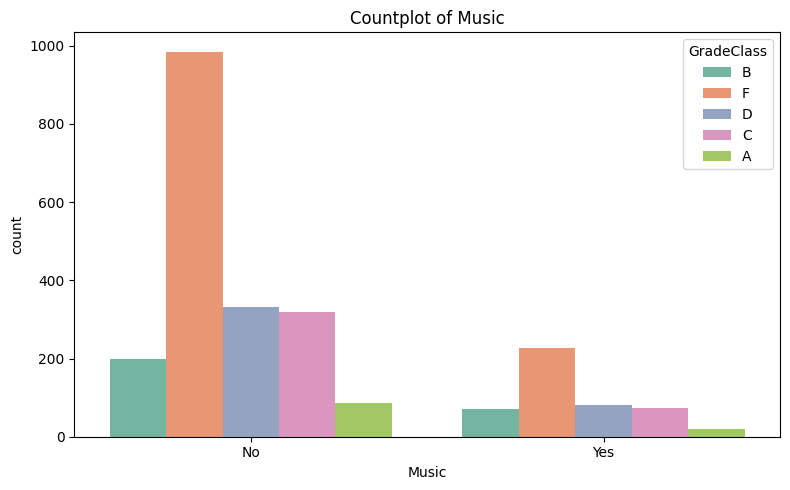

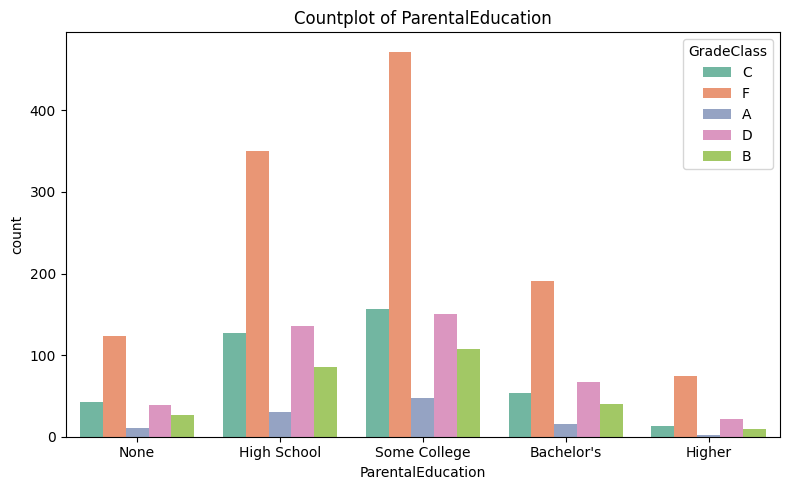

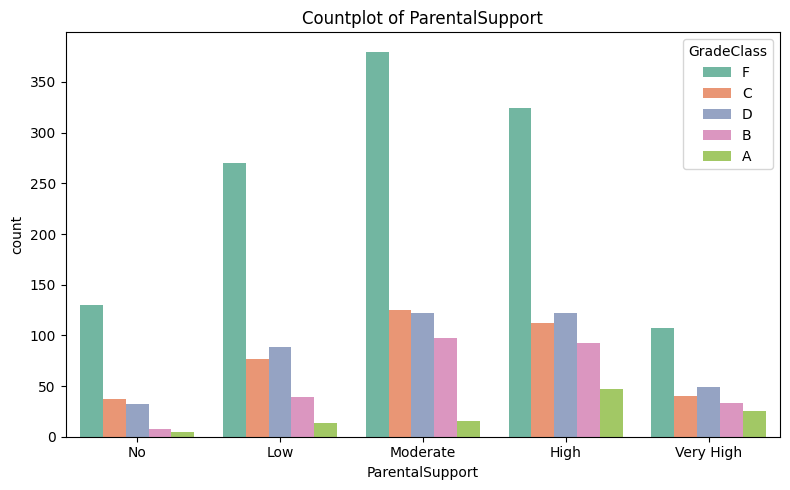

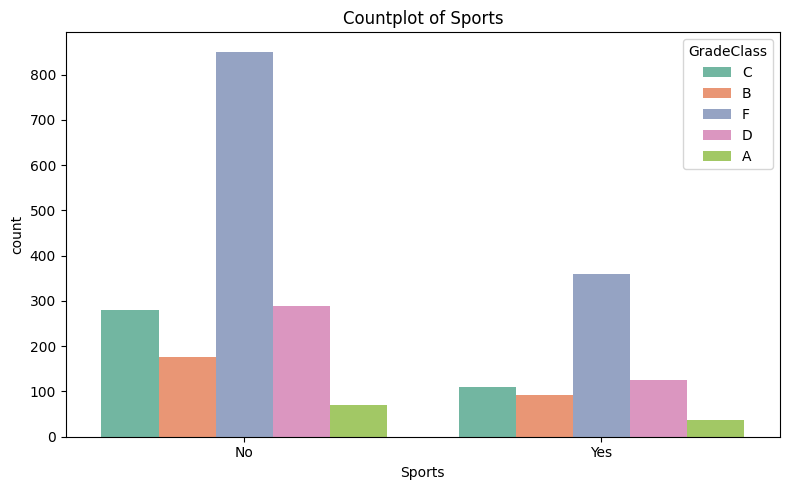

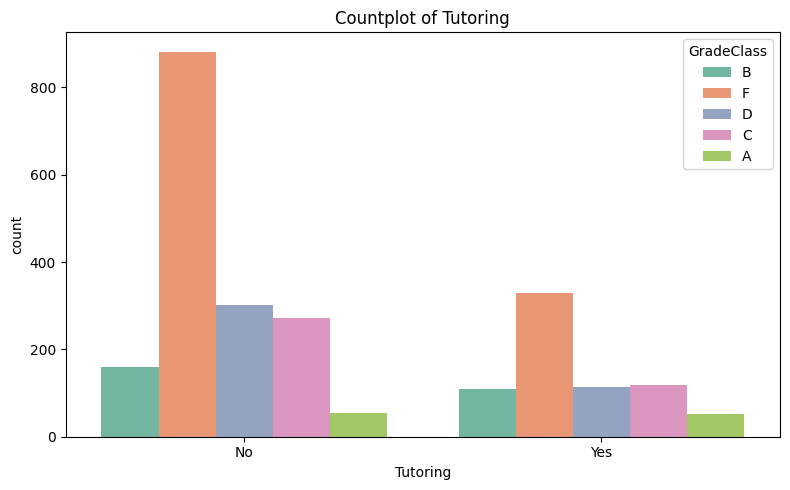

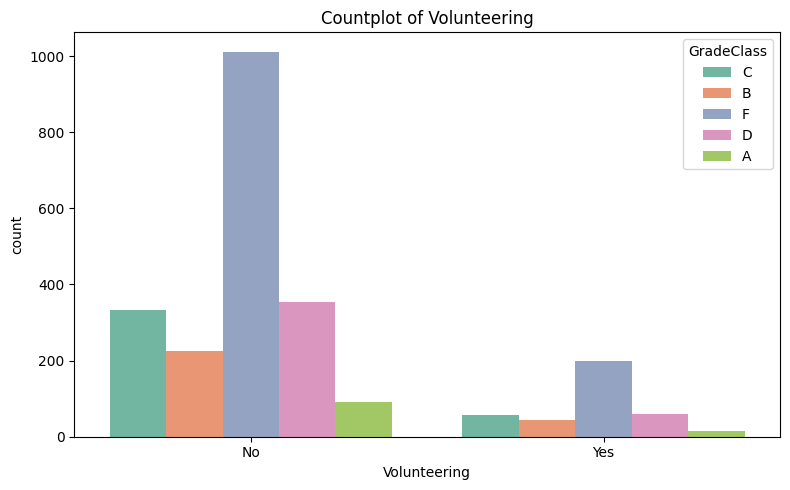

In [ ]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column,hue='GradeClass', palette='Set2')
    plt.title(f'Countplot of {column}')

    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.tight_layout()
    plt.show()

Dari visualisasi categorical features terlihat bahwa Age, Gender, dan Ethnicity tidak menunjukkan pengaruh yang kuat terhadap distribusi GradeClass. Sebaliknya, aktivitas seperti Extracurricular, Sports, Music, dan Volunteering cenderung terkait dengan distribusi nilai yang sedikit lebih seimbang dibandingkan kelompok “No”. Faktor keluarga yaitu ParentalEducation dan ParentalSupport juga memberi kontribusi kecil, di mana tingkat pendidikan orang tua yang lebih tinggi dan dukungan yang lebih besar berhubungan dengan proporsi Grade A–B yang sedikit lebih banyak. Namun demikian, di hampir semua kategori, Grade F tetap yang paling dominan, menegaskan bahwa faktor akademik langsung seperti Absences dan StudyTimeWeekly jauh lebih menentukan dibanding faktor demografis atau aktivitas tunggal.

Correlation heatmap

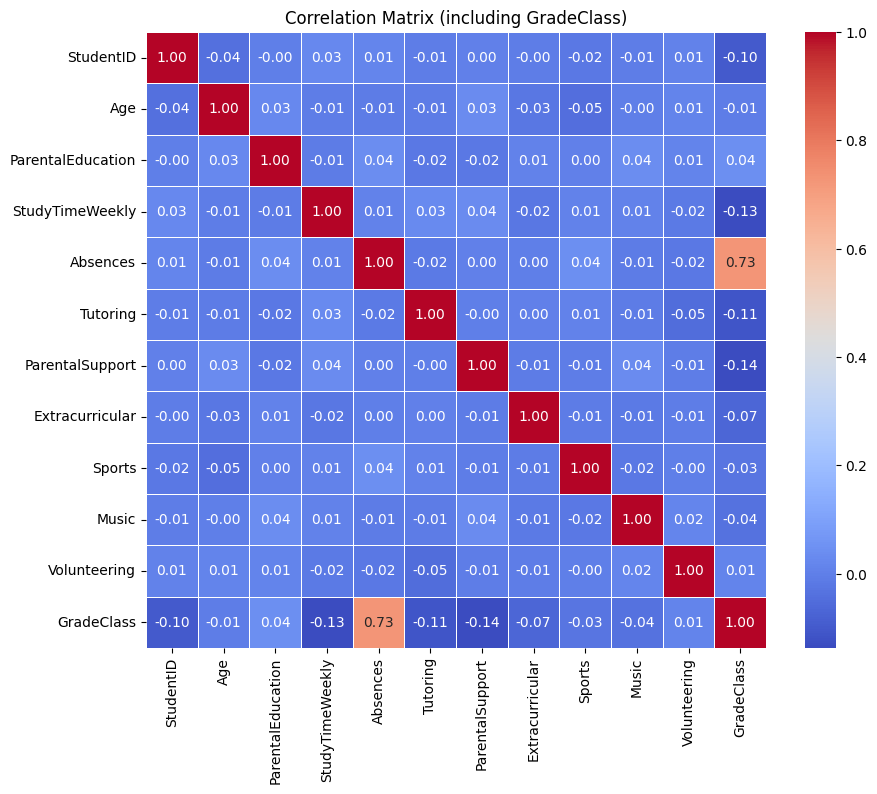

In [ ]:
df_corr = df.copy()
if df_corr["GradeClass"].dtype == "object":
    grade_map = {"A":0, "B":1, "C":2, "D":3, "F":4}
    df_corr["GradeClass"] = df_corr["GradeClass"].map(grade_map)

# correlation matrix
corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (including GradeClass)")
plt.show()

Berdasarkan correlation matrix, faktor Absences memiliki korelasi paling kuat dengan GradeClass (r=0.73). Hal ini menunjukkan bahwa jumlah ketidakhadiran siswa sangat berhubungan dengan penurunan prestasi akademik: semakin sering absen, semakin rendah grade yang diperoleh.

Sementara itu, faktor lain seperti StudyTimeWeekly (r=–0.13) dan ParentalSupport (r=–0.14) hanya memiliki pengaruh lemah terhadap nilai akhir. Korelasi negatif ini sejalan dengan ekspektasi: semakin tinggi waktu belajar dan dukungan orang tua, cenderung nilai lebih baik, meskipun kekuatannya relatif kecil.

Fitur lain (usia, kegiatan ekstrakurikuler, musik, olahraga, dsb.) tidak menunjukkan hubungan linear yang signifikan dengan nilai, sehingga kontribusinya terhadap prediksi grade kemungkinan kecil.

Dengan demikian, Absences dapat dianggap sebagai prediktor utama dalam dataset ini, sedangkan fitur lain mungkin perlu digabungkan dengan metode non-linear (misalnya pohon keputusan) agar hubungan kompleksnya lebih terlihat.

Boxplot median

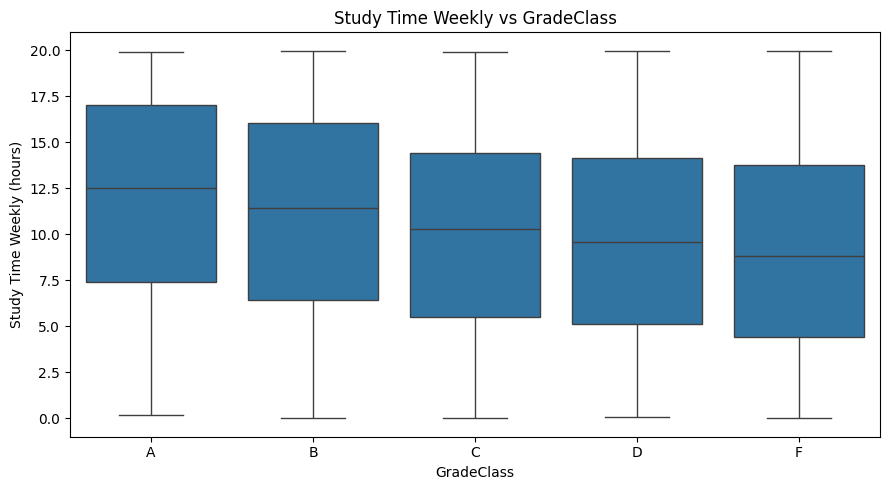

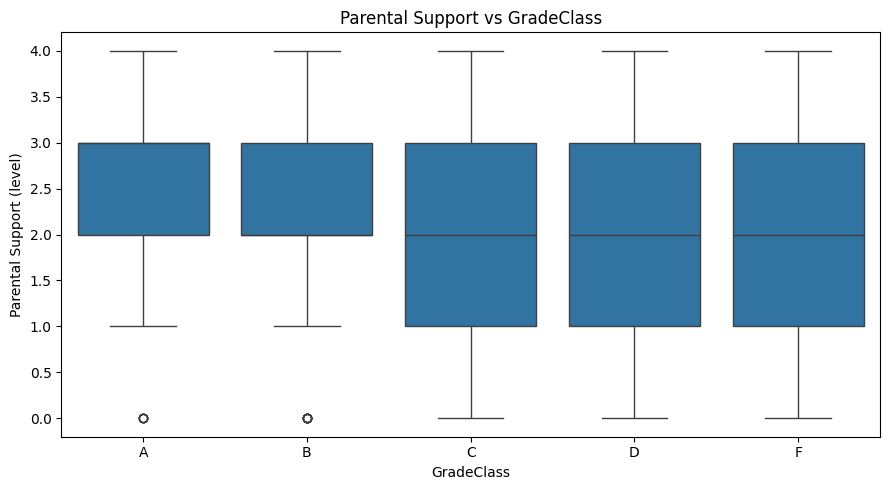

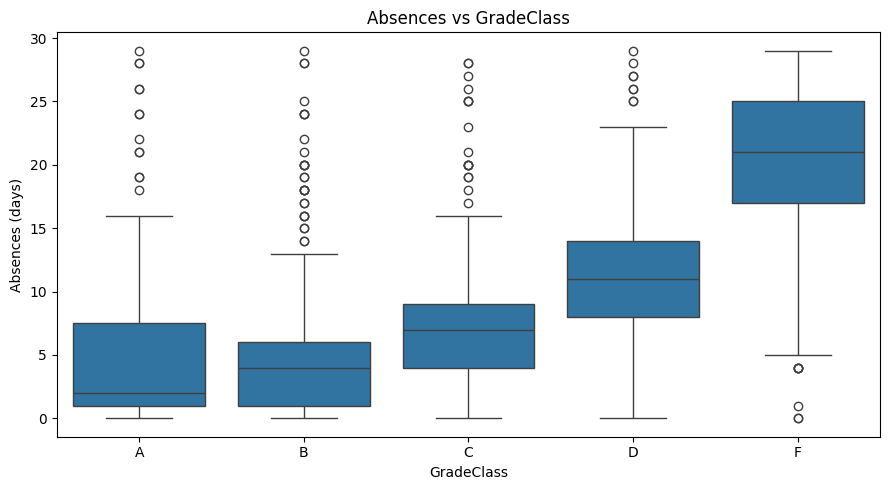

In [ ]:
# --- 1) StudyTimeWeekly vs GradeClass ---
plt.figure(figsize=(9, 5))
sns.boxplot(
    x="GradeClass",
    y="StudyTimeWeekly",
    data=df,
    order=["A", "B", "C", "D", "F"]
)
plt.title("Study Time Weekly vs GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Study Time Weekly (hours)")
plt.tight_layout()
plt.show()


# --- 2) ParentalSupport vs GradeClass ---
plt.figure(figsize=(9, 5))
sns.boxplot(
    x="GradeClass",
    y="ParentalSupport",
    data=df,
    order=["A", "B", "C", "D", "F"]
)
plt.title("Parental Support vs GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Parental Support (level)")
plt.tight_layout()
plt.show()


# --- 3) Absences vs GradeClass ---
plt.figure(figsize=(9, 5))
sns.boxplot(
    x="GradeClass",
    y="Absences",
    data=df,
    order=["A", "B", "C", "D", "F"]
)
plt.title("Absences vs GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Absences (days)")
plt.tight_layout()
plt.show()

Dari ketiga visualisasi terlihat bahwa faktor **Absences** memiliki pengaruh paling kuat terhadap nilai siswa: median absensi pada grade F jauh lebih tinggi (≈20+ hari) dibanding grade A–B (2–4 hari), konsisten dengan korelasi positif kuat (r≈0.73). Faktor **StudyTimeWeekly** juga menunjukkan kecenderungan positif, di mana siswa grade A–B memiliki median jam belajar lebih tinggi (≈11–12,5 jam) dibanding grade rendah (≈9–10 jam), meskipun distribusinya masih tumpang tindih. Sementara itu, **ParentalSupport** tampak relatif serupa di semua grade, hanya sedikit lebih tinggi pada grade A–B, sehingga kontribusinya terhadap prestasi akademik relatif lemah. Secara keseluruhan, absensi muncul sebagai prediktor utama, sedangkan waktu belajar dan dukungan orang tua berperan lebih kecil namun tetap relevan.


# Data Preprocessing

Tahap ini dilakukan untuk mempersiapkan data sebelum nantinya menjadi input ke dalam model seperti split data train dan test dan scaling.

**Lakukan seleksi fitur untuk mendapatkan akurasi yang baik pada model dan jelaskan mengapa fitur tersebut yang terpilih**

### Data cleaning

In [ ]:
cdf = df.copy()

#### cek missing value

In [ ]:
print(cdf.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64


#### Hapus duplicate value

In [ ]:
print(cdf.drop_duplicates(inplace=True))

None


#### cek data outlier

In [ ]:
print(cdf.columns)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'],
      dtype='object')


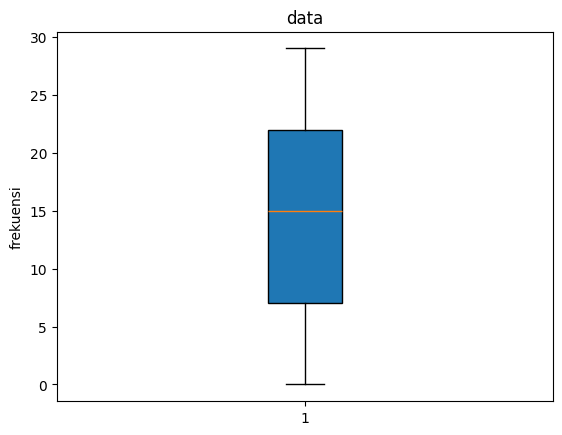

Series([], Name: Absences, dtype: int64)


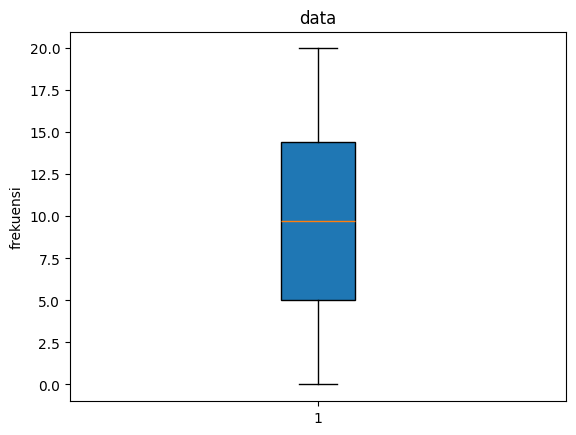

Series([], Name: StudyTimeWeekly, dtype: float64)


In [ ]:
def outlier(data):
  Q1 = np.quantile(data, 0.25)
  Q3 = np.quantile(data, 0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]

  plt.boxplot(data, patch_artist=True)
  plt.title("data")
  plt.ylabel("frekuensi")
  plt.show()
  return outliers

print(outlier(df["Absences"]))
print(outlier(df["StudyTimeWeekly"]))

### Data Transformation

In [ ]:
Ethnicity_map = {"Caucasian": 0, "African American":1, "Asian":2, "Other": 3}
cdf["Ethnicity"] = cdf["Ethnicity"].map(Ethnicity_map)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GradeClass         2392 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 261.8+ KB


#### data selection

In [ ]:
cdf = cdf.drop(["StudentID", "Gender", "Age"], axis=1)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ethnicity          2392 non-null   int64  
 1   ParentalEducation  2392 non-null   int64  
 2   StudyTimeWeekly    2392 non-null   float64
 3   Absences           2392 non-null   int64  
 4   Tutoring           2392 non-null   int64  
 5   ParentalSupport    2392 non-null   int64  
 6   Extracurricular    2392 non-null   int64  
 7   Sports             2392 non-null   int64  
 8   Music              2392 non-null   int64  
 9   Volunteering       2392 non-null   int64  
 10  GradeClass         2392 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 205.7+ KB


In [ ]:
x = cdf.drop("GradeClass", axis=1)
y = cdf["GradeClass"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling + Evaluation

Tahap ini merupakan tahap pembuatan model menggunakan data train untuk melatih model dan data test untuk melakukan evaluasi terhadap kinerja model.

## Decision Tree

### Without Hyperparameter

In [ ]:
dt_clf = DecisionTreeClassifier()
model1 = dt_clf.fit(X_train, y_train)

In [ ]:
y_pred = model1.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.35      0.32      0.33        22
           B       0.37      0.45      0.40        49
           C       0.51      0.51      0.51        85
           D       0.44      0.40      0.42        86
           F       0.83      0.83      0.83       237

    accuracy                           0.63       479
   macro avg       0.50      0.50      0.50       479
weighted avg       0.63      0.63      0.63       479



In [ ]:
acc1 = accuracy_score(y_test, y_pred)
print(acc1)

0.6325678496868476


<Axes: >

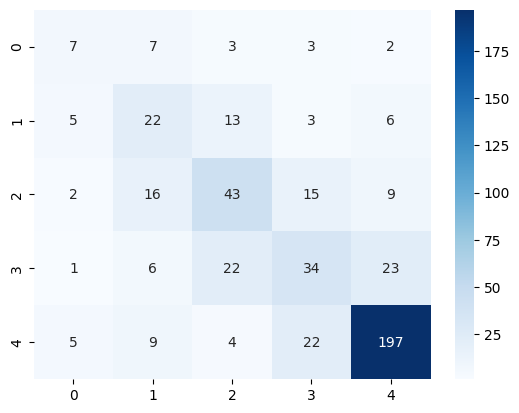

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    model1,
    out_file = "/content/drive/MyDrive/machine learning/Student_performance_data_prak_1_tree.dot",
    feature_names = ['Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering'],
    class_names = ['A', 'B', 'C', 'D', 'F'],
    rounded= True,
    filled =True
)

[Text(0.6639072985460162, 0.9761904761904762, 'x[3] <= 0.534\ngini = 0.671\nsamples = 1913\nvalue = [85.0, 220.0, 306.0, 328.0, 974.0]'),
 Text(0.405673299691095, 0.9285714285714286, 'x[3] <= 0.328\ngini = 0.768\nsamples = 1012\nvalue = [73, 200, 291, 282, 166]'),
 Text(0.5347902991185556, 0.9523809523809523, 'True  '),
 Text(0.21111891510438857, 0.8809523809523809, 'x[3] <= 0.121\ngini = 0.718\nsamples = 620\nvalue = [65.0, 189.0, 237.0, 108.0, 21.0]'),
 Text(0.07874414145717938, 0.8333333333333334, 'x[5] <= 0.375\ngini = 0.657\nsamples = 238\nvalue = [51, 109, 70, 6, 2]'),
 Text(0.044471665956540264, 0.7857142857142857, 'x[4] <= 0.5\ngini = 0.616\nsamples = 70\nvalue = [8, 21, 37, 3, 1]'),
 Text(0.03270132083510865, 0.7380952380952381, 'x[2] <= 0.763\ngini = 0.497\nsamples = 52\nvalue = [2, 11, 35, 3, 1]'),
 Text(0.02449936088623775, 0.6904761904761905, 'x[9] <= 0.5\ngini = 0.38\nsamples = 43\nvalue = [0.0, 7.0, 33.0, 3.0, 0.0]'),
 Text(0.018321261184490838, 0.6428571428571429, 'x[2]

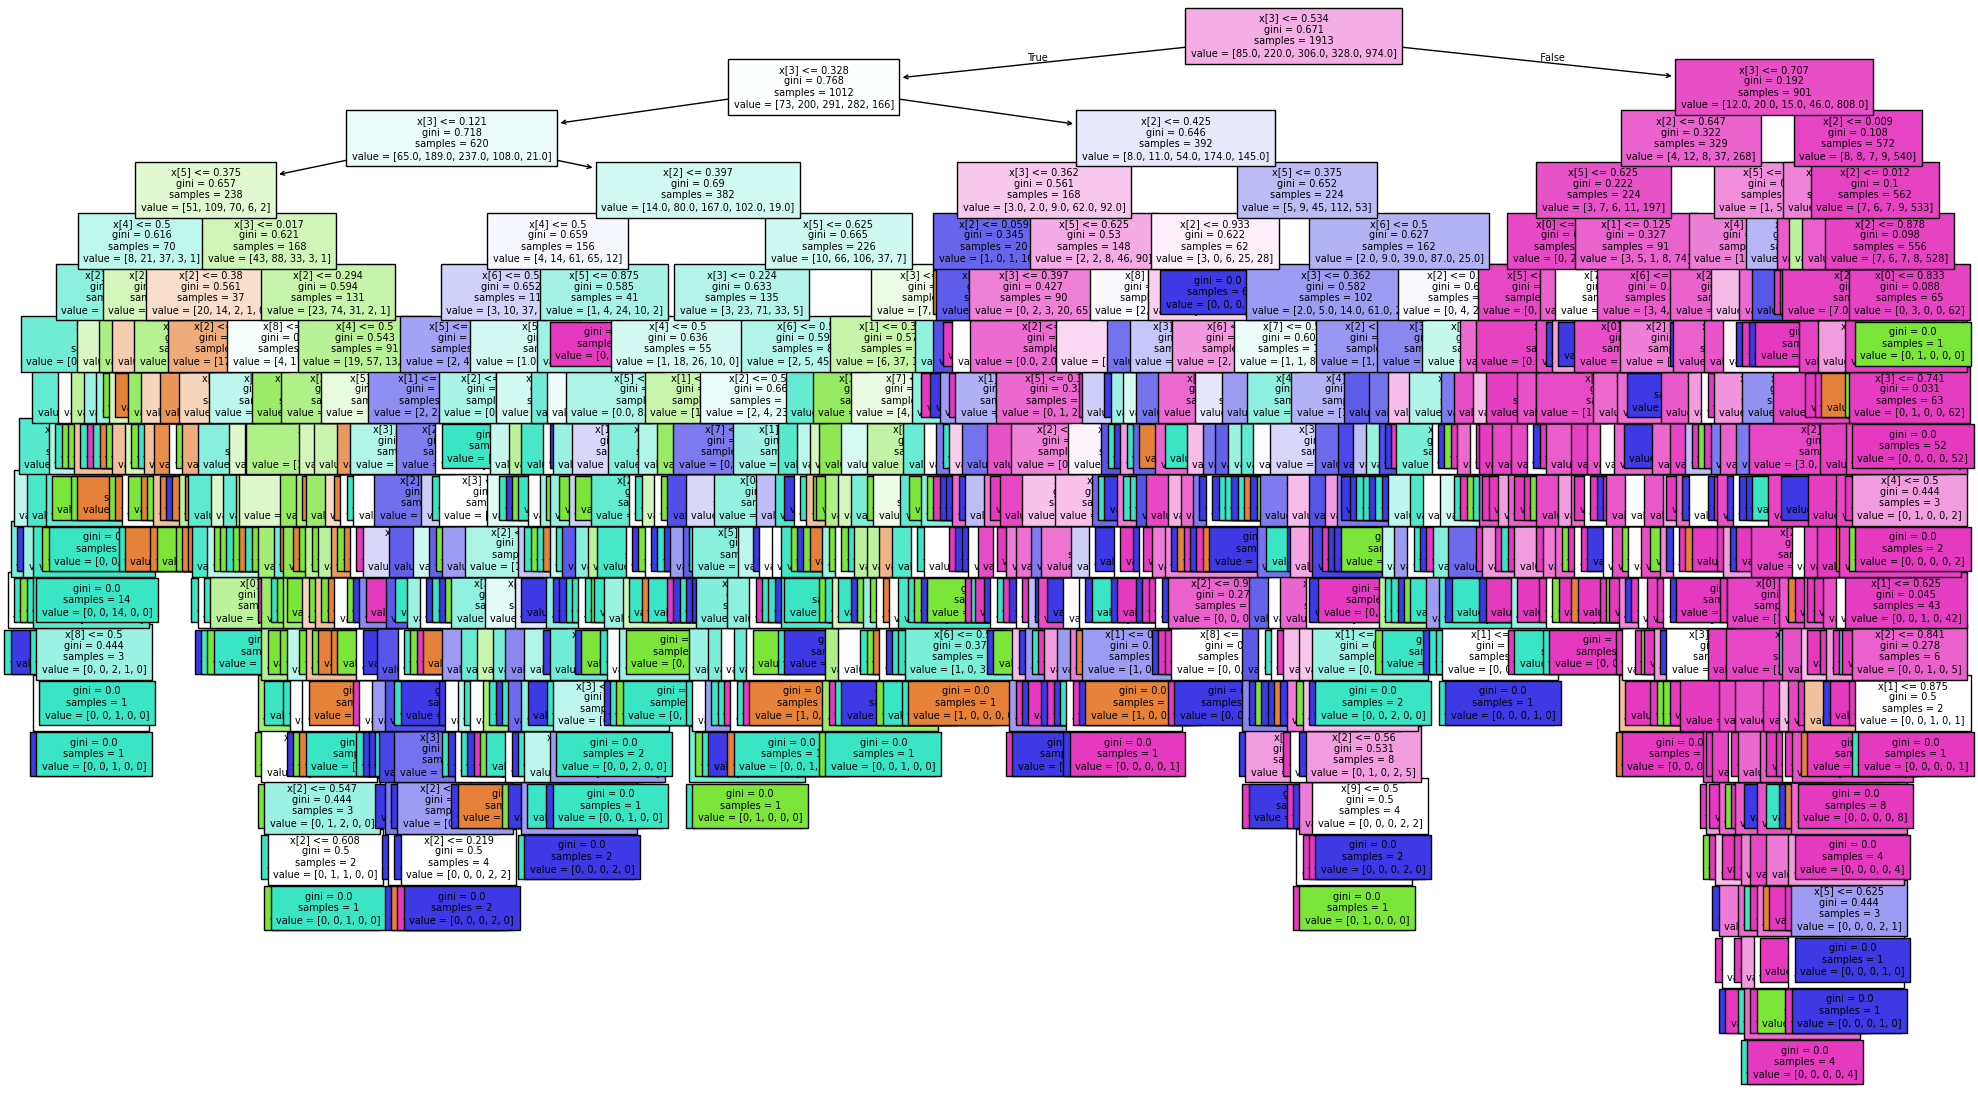

In [ ]:
plt.figure(figsize=(24,14))
tree.plot_tree(model1, filled=True, fontsize=7)

### With Hyperparameter

In [ ]:
param_grid = {'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'criterion' : ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid,
                           cv=5,
                           scoring='accuracy')

model2 = grid_search.fit(X_train, y_train)

In [ ]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.50      0.14      0.21        22
           B       0.44      0.47      0.46        49
           C       0.47      0.60      0.53        85
           D       0.49      0.29      0.36        86
           F       0.84      0.93      0.88       237

    accuracy                           0.67       479
   macro avg       0.55      0.48      0.49       479
weighted avg       0.66      0.67      0.65       479



In [ ]:
acc2 = accuracy_score(y_test, y_pred)
print(acc2)

0.6722338204592901


<Axes: >

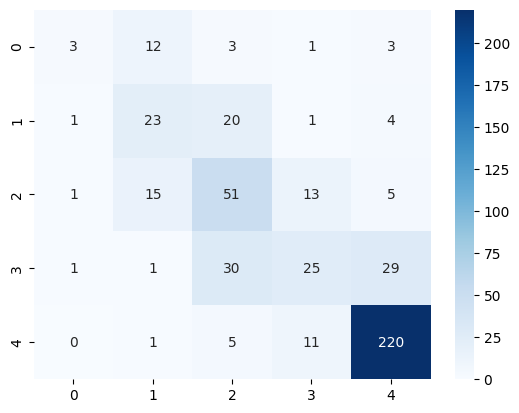

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### Kesimpulan

Pada Decision Tree, baseline menghasilkan akurasi 0.63 dengan macro average sekitar 0.49 dan weighted average 0.63. Nilai f1 pada kelas A masih sangat rendah (0.22), sedangkan kelas F cukup tinggi (0.82). Setelah tuning, akurasi naik menjadi 0.67, macro average menjadi 0.55, dan weighted average 0.65. Performa kelas C dan F meningkat cukup besar meskipun kelas A tetap sulit diprediksi.

## Naive Bayes

### Without Hyperparameter

In [ ]:
Gnb = GaussianNB()
model3 = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.25      0.05      0.08        22
           B       0.31      0.20      0.25        49
           C       0.40      0.53      0.46        85
           D       0.41      0.33      0.36        86
           F       0.84      0.93      0.88       237

    accuracy                           0.63       479
   macro avg       0.44      0.41      0.40       479
weighted avg       0.60      0.63      0.61       479



In [ ]:
acc3 = accuracy_score(y_test, y_pred)
print(acc3)

0.6346555323590815


<Axes: >

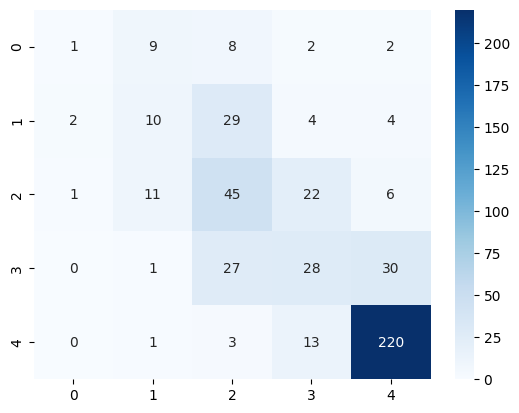

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### With Hyperparameter

In [ ]:
param_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    scoring='accuracy',
)

model4 = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

In [ ]:
y_pred = model4.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.25      0.05      0.08        22
           B       0.31      0.20      0.25        49
           C       0.40      0.53      0.46        85
           D       0.41      0.33      0.36        86
           F       0.84      0.93      0.88       237

    accuracy                           0.63       479
   macro avg       0.44      0.41      0.40       479
weighted avg       0.60      0.63      0.61       479



In [ ]:
acc4 = accuracy_score(y_test, y_pred)
print(acc4)

0.6346555323590815


<Axes: >

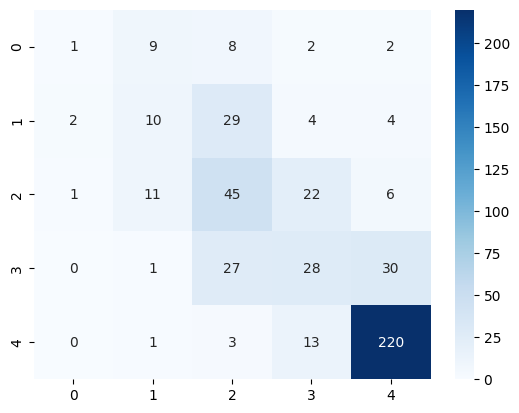

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### Kesimpulan

Naive Bayes menunjukkan hasil yang hampir sama antara baseline dan tuned. Akurasi tetap sekitar 0.63 dan rata-rata metrik tidak banyak berubah. Hal ini menunjukkan bahwa asumsi distribusi Naive Bayes kurang sesuai dengan data sehingga tuning tidak banyak membantu.

## K Nearest Neighbors

### Without Hyperparameter

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
model5 = knn.fit(X_train, y_train)

In [ ]:
y_pred = model5.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.29      0.27      0.28        22
           B       0.30      0.41      0.35        49
           C       0.33      0.40      0.36        85
           D       0.33      0.23      0.27        86
           F       0.82      0.79      0.80       237

    accuracy                           0.56       479
   macro avg       0.41      0.42      0.41       479
weighted avg       0.57      0.56      0.56       479



In [ ]:
acc5 = accuracy_score(y_test, y_pred)
print(acc5)

0.55741127348643


<Axes: >

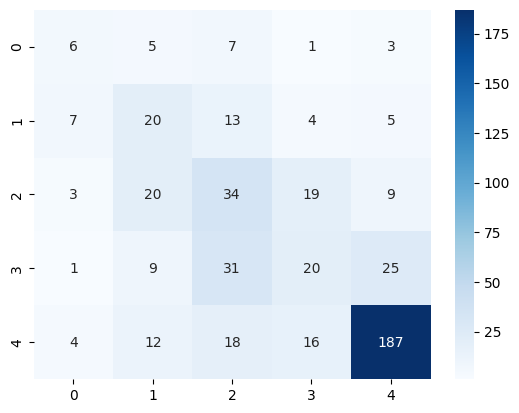

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### With Hyperparameter

In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5]
}
knn = GridSearchCV (KNeighborsClassifier(),
                    param_grid ,
                    cv = 5 ,
                    verbose = 2)
model6 = knn.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_

In [ ]:
y_pred = model6.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.36      0.18      0.24        22
           B       0.38      0.35      0.36        49
           C       0.38      0.47      0.42        85
           D       0.32      0.26      0.28        86
           F       0.80      0.84      0.81       237

    accuracy                           0.59       479
   macro avg       0.45      0.42      0.42       479
weighted avg       0.57      0.59      0.58       479



In [ ]:
acc6 = accuracy_score(y_test, y_pred)
print(acc6)

0.5866388308977035


<Axes: >

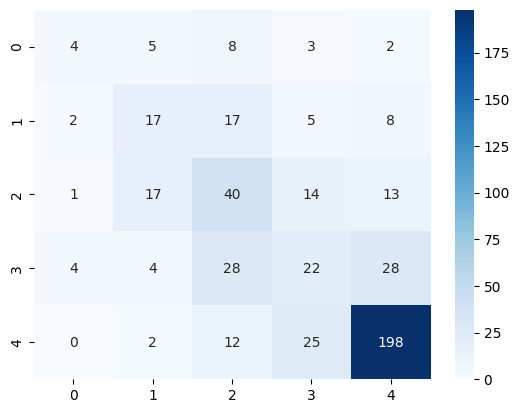

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### Kesimpulan

KNN baseline memiliki akurasi 0.56 dengan macro average rendah (sekitar 0.27). Setelah tuning, akurasi naik menjadi 0.59 dan macro average sedikit membaik menjadi 0.29. Kelas mayoritas (seperti F) membaik, tetapi kelas minoritas masih sulit diprediksi.

## Multinominal Logistic Regression**


### Without Hyperparemeter

In [ ]:
LR = LogisticRegression(max_iter=1000, random_state=0)
model7 = LR.fit(X_train, y_train)

In [ ]:
y_pred = model7.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        22
           B       0.42      0.41      0.41        49
           C       0.51      0.59      0.55        85
           D       0.49      0.27      0.35        86
           F       0.82      0.98      0.89       237

    accuracy                           0.68       479
   macro avg       0.45      0.45      0.44       479
weighted avg       0.63      0.68      0.64       479



In [ ]:
acc7 = accuracy_score(y_test, y_pred)
print(acc7)

0.6784968684759917


<Axes: >

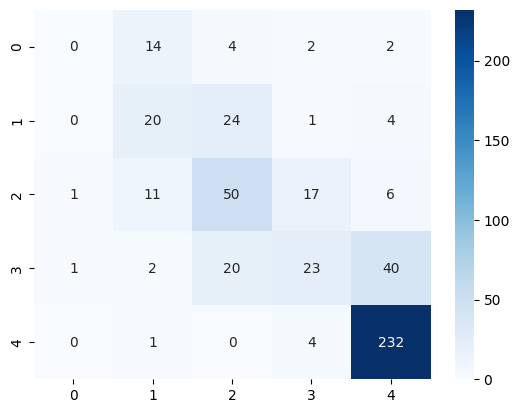

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### With Hyperparameter

In [ ]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,500,1000]
}
]

LR = GridSearchCV(LogisticRegression(),
                  param_grid,
                  cv=3,
                  verbose=2)
model8 = LR.fit(X_train, y_train)



Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.0001, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....C=0.0001, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....C=0.0001, max_iter=100, 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.623776739188721, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.281332398719396, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l2, solver=liblinear; total t

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=500, penalty=l2, solver=sag; total ti

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=sag; total ti

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=500, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=500, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=500, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=500, penalty=l2, solver=sag; total ti

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=sa

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2340 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

In [ ]:
y_pred = model8.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.17      0.05      0.07        22
           B       0.43      0.45      0.44        49
           C       0.55      0.59      0.57        85
           D       0.54      0.37      0.44        86
           F       0.84      0.96      0.90       237

    accuracy                           0.70       479
   macro avg       0.51      0.48      0.48       479
weighted avg       0.66      0.70      0.67       479



In [ ]:
acc8 = accuracy_score(y_test, y_pred)
print(acc8)

0.6951983298538622


<Axes: >

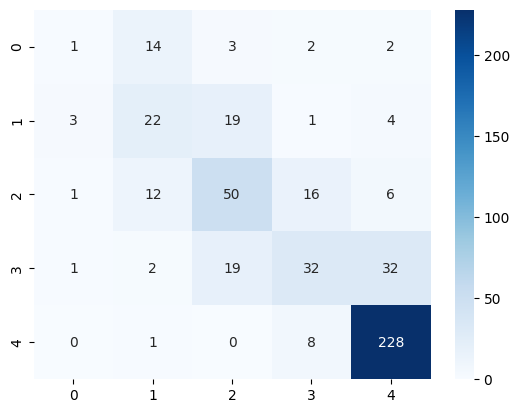

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### Kesimpulan

Logistic Regression menjadi model dengan performa terbaik. Versi baseline mencapai akurasi 0.68, namun macro average masih rendah (sekitar 0.35–0.40). Setelah tuning, akurasi naik menjadi 0.70 dan macro average meningkat menjadi sekitar 0.44. Kelas mayoritas seperti C, D, dan F memiliki nilai precision, recall, dan f1-score yang tinggi, sementara kelas minoritas masih rendah tetapi sedikit lebih baik dibanding baseline.

## Perceptron

### Without Hyperparameter

In [ ]:
perceptron = Perceptron(tol=1e-3, random_state=0)
model9 = perceptron.fit(X_train, y_train)

In [ ]:
y_pred = model9.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        22
           B       0.29      0.18      0.23        49
           C       0.43      0.19      0.26        85
           D       0.16      0.15      0.15        86
           F       0.71      0.98      0.82       237

    accuracy                           0.57       479
   macro avg       0.32      0.30      0.29       479
weighted avg       0.49      0.57      0.51       479



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
acc9 = accuracy_score(y_test, y_pred)
print(acc9)

0.5657620041753654


<Axes: >

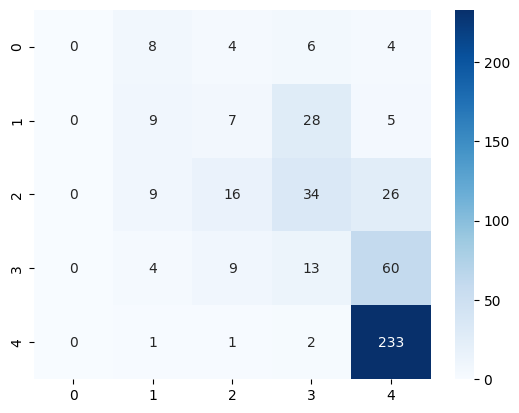

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

###

### With Hyperparameter

In [ ]:
perceptron = Perceptron(tol=1e-3, random_state=0)
param_grid = {
    "penalty": [None, "l2", "l1", "elasticnet"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "max_iter": [500, 1000, 2000],
    "eta0": [0.1, 0.01, 0.001]
}

percp = GridSearchCV(
    estimator=perceptron,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

model10 = percp.fit(X_train, y_train)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [ ]:
y_pred = model10.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.29      0.18      0.22        22
           B       0.38      0.18      0.25        49
           C       0.36      0.24      0.28        85
           D       0.15      0.14      0.15        86
           F       0.75      0.97      0.85       237

    accuracy                           0.58       479
   macro avg       0.38      0.34      0.35       479
weighted avg       0.51      0.58      0.53       479



In [ ]:
acc10 = accuracy_score(y_test, y_pred)
print(acc10)

0.5762004175365344


<Axes: >

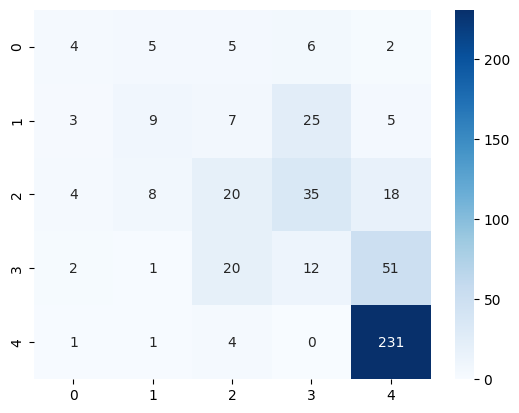

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

### Kesimpulan

Perceptron relatif lemah. Akurasi baseline sekitar 0.57 dan setelah tuning hanya naik tipis ke 0.58. Macro average tetap rendah dan sebagian besar kelas selain F sulit dikenali.

##

# Kesimpulan

**Analisis model terbaik dan berikan alasan mengapa kinerja paling baik di antara model-model yang lain.**

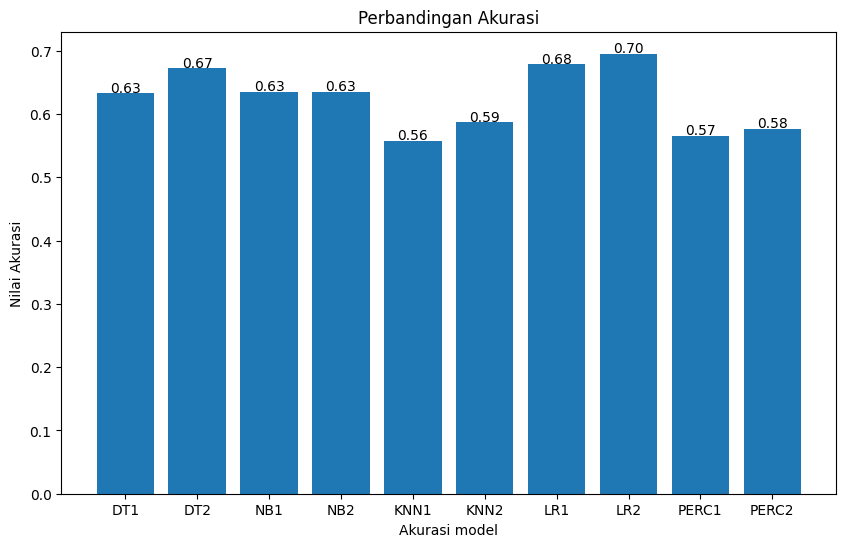

In [ ]:
acc = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10]
labels = ['DT1', 'DT2', 'NB1', 'NB2', 'KNN1', 'KNN2', 'LR1', 'LR2', 'PERC1', 'PERC2']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, acc)

# Tambahkan judul dan label sumbu
plt.title("Perbandingan Akurasi")
plt.xlabel("Akurasi model")
plt.ylabel("Nilai Akurasi")

for i, v in enumerate(acc):
    plt.text(i, v + 0.002, f"{v:.2f}", ha="center")

plt.show()

## Kesimpulan Akhir

1. Semua model menunjukkan hasil lebih baik setelah hyperparameter tuning. Hal ini terlihat dari kenaikan nilai precision, recall, dan f1-score (macro dan weighted average).  
2. Absences adalah faktor terkuat yang berhubungan dengan nilai siswa (r≈0.73). Siswa dengan absensi tinggi cenderung memperoleh grade rendah.  
3. Model terbaik adalah Logistic Regression (tuned) dengan akurasi sekitar 0.70 dan f1-score tertinggi dibanding model lain.  
4. Faktor peningkatan performa tiap model:  
   - Decision Tree: pembatasan kedalaman (max_depth) menghasilkan generalisasi lebih baik.  
   - Naive Bayes: var_smoothing menstabilkan estimasi meskipun efeknya kecil.  
   - KNN: scaling dan optimasi n_neighbors meningkatkan akurasi.  
   - Logistic Regression: regularisasi (C, penalty) menyeimbangkan bias–variance dan menghasilkan performa terkuat.  
   - Perceptron: performanya terbatas, meskipun setelah tuning ada sedikit perbaikan.  

Kesimpulan: Logistic Regression dengan tuning adalah model paling andal pada dataset ini. Namun, imbalance data (ketidakseimbangan kelas) membuat prediksi untuk kelas minoritas (A, B) masih lemah. Untuk perbaikan, bisa dipertimbangkan teknik oversampling atau cost-sensitive learning.
